In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data_visualize = pd.read_csv("noWindSpeed_pd.csv")

data_visualize

,DAT,WL_Flume (m3/hour),WL_Flume_OUT (m3/hour),Solar (W/m2),Precipitation (mm),AirTemp (DegC),RH (%),delta PD (mm)
0,164.791667,0.024406,0.156048,42,0.000,24.20,84.90,-0.1
1,164.833333,0.031719,0.136486,4,0.000,23.30,88.40,-0.1
2,164.875000,0.031719,0.136486,0,0.000,22.80,90.50,-0.1
3,164.916667,0.031719,0.060883,0,0.000,22.60,91.50,-0.1
4,164.958333,0.040201,0.049905,0,1.766,22.60,92.40,0.2
...,...,...,...,...,...,...,...,...
2442,267.250000,0.000000,0.000000,0,0.000,2.29,101.16,-0.1
2443,267.291667,0.000000,0.000000,12,0.000,2.33,101.20,0.0
2444,267.333333,0.000000,0.000000,82,0.017,2.12,101.22,0.0
2445,267.375000,0.000000,0.000000,195,0.000,1.91,101.22,0.0


In [3]:
LEARNING_RATE = 0.001
TRAINNING_STEP = 30000
DISPLAY_STEP = 10000

X_LABLE = len(data_visualize.columns) - 1

In [4]:
data = np.loadtxt("noWindSpeed_np.csv", delimiter = ',', dtype = np.float32)

x = data[:, :X_LABLE]
y = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

w = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
bias = tf.Variable(random.random())

In [5]:
def compute_loss():
    hypothesis = tf.matmul(x_train, w) + bias
    loss = tf.reduce_mean((hypothesis - y_train) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = LEARNING_RATE)

for step in range(1, TRAINNING_STEP + 1):
    optimizer.minimize(compute_loss, var_list = [w, bias])
    
    if step % DISPLAY_STEP == 0:
        print('step:', step, '\n', 'w:', '\n', w.numpy(), '\n', 'bias:', bias.numpy(), 
              '\n', 'loss:', compute_loss().numpy(), '\n')

step: 10000 
 w: 
 [[-6.6932826e-04]
 [ 4.9755261e-03]
 [-7.5267944e-03]
 [-9.3387614e-05]
 [ 7.0791699e-02]
 [-4.6049077e-03]
 [-3.0992050e-03]] 
 bias: 0.50928557 
 loss: 0.03622521 

step: 20000 
 w: 
 [[-1.1336620e-04]
 [ 4.0655280e-03]
 [-8.2912659e-03]
 [-4.4888013e-05]
 [ 6.9188409e-02]
 [-1.4097032e-03]
 [-6.5518537e-04]] 
 bias: 0.09607877 
 loss: 0.035224997 

step: 30000 
 w: 
 [[ 7.06610081e-05]
 [ 3.87663743e-03]
 [-8.92476179e-03]
 [-2.24514170e-05]
 [ 6.84323907e-02]
 [-1.21456746e-04]
 [ 4.47517523e-04]] 
 bias: -0.07270374 
 loss: 0.035119426 



In [6]:
y_hat = tf.matmul(x_test, w) + bias

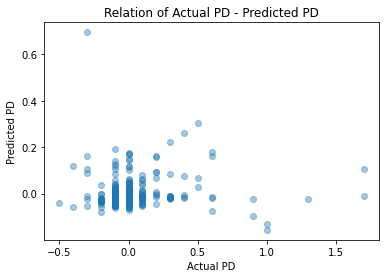

In [7]:
plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [8]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_hat))

RMSE: 0.18412939
MAE: 0.08895692
